In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path
from scripts.cross_match_scripts import pandas_to_fits, desi_reliable_magnitudes
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns
%matplotlib inline

matplotlib settings set


matplotlib settings set


# Counterparts and field sources catalogs construction

## Load DESI-CSC 30 arcsec cone search match

In [3]:
desi_csc_orig = pd.read_pickle(data_path+'/csc_allsky_desi_r30_gaia_dered.gz_pkl',compression='gzip')

In [4]:
desi_csc_orig = desi_reliable_magnitudes(desi_csc_orig) #make cuts for SNR of flux + add colors
desi_csc_orig

/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getat

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
0,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9135,336127,359.993680,0.721193,1,0.264035,0.761373,1.464151,-2.279967,-0.936121,-109.650260,-1274.12740,2924.99000,2268.87720,293.554100,3.076859,0.628511,0.000788,0.000010,23.857758,22.736668,22.052845,NaN,NaN,NaN,NaN,14.279862,36.266293,25.085913,-3.999284,-0.742145,-3.078044,-4.096002,0.0,0.0,0.0,0.0,0.0,0.0,27.164009,9010_336127_9135,23.945846,23.945846,23.857758,22.796006,22.796006,22.736668,22.086035,22.086035,22.052845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.520281e-15,1.121090,1.804913,0.683823,NaN,NaN,NaN,NaN,NaN,NaN
1,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9169,336127,359.994202,0.722597,1,0.994499,2.786103,5.748118,6.166792,6.704570,-0.933517,1110.99740,2478.61230,1837.17550,249.912500,2.884505,0.622227,0.000782,0.000011,22.417845,21.328133,20.567974,20.519806,20.430973,NaN,14.885468,49.511795,119.418724,90.869820,10.473576,5.288656,-0.026110,3.618951,0.0,0.0,0.0,0.0,0.0,0.0,23.070881,9010_336127_9169,22.505989,22.505989,22.417845,21.387507,21.387507,21.328133,20.601186,20.601186,20.567974,20.524852,20.524852,20.519806,17.825852,20.434073,20.434073,20.430973,17.095073,NaN,NaN,NaN,NaN,14.885717,NaN,NaN,NaN,9.894579e-15,1.089712,1.849871,0.760159,0.048168,0.897160,0.088833,NaN,NaN,NaN
2,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9295,336127,359.997367,0.721166,1,0.287270,0.334849,0.528142,-1.608118,0.423848,16.828413,692.35394,2346.16870,1762.25840,213.479600,2.978809,0.614420,0.000778,0.000010,23.765974,23.628395,23.159851,NaN,23.428870,19.434230,15.398930,13.914554,14.056722,7.716652,-2.775487,0.332233,0.469412,2.225948,0.0,0.0,0.0,0.0,0.0,0.0,17.638166,9010_336127_9295,23.854274,23.854274,23.765974,23.687877,23.687877,23.628395,23.193123,23.193123,23.159851,NaN,NaN,NaN,NaN,23.431975,NaN,NaN,NaN,19.434892,NaN,NaN,NaN,15.399180,NaN,NaN,NaN,9.091730e-16,0.137579,0.606123,0.468544,NaN,NaN,NaN,NaN,NaN,NaN
3,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9271,336127,359.996619,0.722544,1,0.195305,0.580013,1.060394,-1.374197,0.465793,55.299458,840.05010,1941.29630,1459.10840,181.554780,2.827259,0.595737,0.000749,0.000010,24.184935,23.031937,22.403067,NaN,23.326414,18.142536,15.188987,8.605151,22.155508,14.287992,-2.310637,0.359518,1.513426,2.704489,0.0,0.0,0.0,0.0,0.0,0.0,15.723989,9010_336127_9271,24.273217,24.273217,24.184935,23.091406,23.091406,23.031937,22.436332,22.436332,22.403067,NaN,NaN,NaN,NaN,23.329518,NaN,NaN,NaN,18.143198,NaN,NaN,NaN,15.189237,NaN,NaN,NaN,1.825409e-15,1.152998,1.781868,0.628870,NaN,NaN,NaN,NaN,NaN,NaN
4,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9360,336127,359.998741,0.722629,1,0.162211,0.722331,4.141845,10.932156,10.346854,281.147600,-6404.08400,1451.76900,1055.47450,125.596010,2.283064,0.530093,0.000696,0.000010,24.386390,22.793606,20.923704,19.898174,19.959871,16.377000,NaN,6.180582,23.467144,46.417503,16.518280,7.533284,7.418694,-20.397125,0.0,0.0,0.0,

### Primary filters and DESI duplicates (ra,dec) removal

In [35]:
#step 1: filter brick ID
#next sort by name_csc, ra, dec and flux_g, with flux_g from largest to smallest
desi_csc = desi_csc_orig.query('csc_flux_05_2 >= 3e-15')
desi_csc = desi_csc.query('brick_primary == True')
print('desi reliable catalog:', len(desi_csc))
desi_csc = desi_csc.sort_values(by=['csc_name', 'csc_ra', 'csc_dec', 'flux_g'], ascending=[True, True, True, False])

#step 2: remove duplicates in ['ra_csc', 'dec_csc', 'ra', 'dec'] and keep the one with the highest flux_g 
desi_csc = desi_csc.drop_duplicates(subset=['csc_ra', 'csc_dec', 'ra', 'dec'], keep='first')

print('desi reliable catalog after non-primary brick and duplicates removal:', len(desi_csc))
print('number of csc sources after filtering', desi_csc.csc_name.nunique())
#sort by sep_csc so that the closest objects are first
desi_csc.sort_values(by=['csc_name', 'dist_arcsec'], inplace=True)
desi_csc.sample(10)

desi reliable catalog: 1384805
desi reliable catalog after non-primary brick and duplicates removal: 1384801
number of csc sources after filtering 60672


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
502340,2CXO J021212.1-465330,33.050650,-46.891725,9.685767e-14,1.121150,3.136023,9010,5126,88908,33.048531,-46.897854,1,0.102891,0.302926,0.289538,1.152881,-1.612103,-60.216900,-3.815009,3672.43160,2317.334200,268.203370,5.804254,1.380185,0.001300,0.000016,24.906555,23.754557,23.822186,22.341960,NaN,NaN,NaN,6.235265,14.582469,4.741743,2.777524,-1.893919,-2.170810,-0.015216,0.0,0.0,0.0,0.0,0.0,0.0,22.672799,9010_88908_5126,24.969057,24.969057,24.906555,23.796659,23.796659,23.754557,23.845736,23.845736,23.822186,22.345539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.939836e-16,1.151998,1.084369,-0.067629,NaN,NaN,NaN,NaN,NaN,NaN
1123271,2CXO J061633.1-522436,94.138152,-52.410230,5.727757e-15,0.419170,1.172482,9010,789,68566,94.126799,-52.414615,1,0.492851,1.211666,1.861933,4.061099,0.259790,22.056395,1050.825800,435.28740,735.304400,90.885940,6.341740,2.160377,0.004270,0.000049,23.102560,22.179958,21.762674,20.968908,23.957619,19.139921,14.945704,10.282615,32.856140,17.750576,10.226989,0.381846,1.441220,7.333164,0.0,0.0,0.0,0.0,0.0,0.0,29.508506,9010_68566_789,23.268211,23.268211,23.102560,22.291543,22.291543,22.179958,21.825090,21.825090,21.762674,20.978391,20.978391,20.968908,18.279391,23.963444,NaN,NaN,NaN,19.141164,NaN,NaN,NaN,14.946173,14.946173,14.945704,8.326173,3.292436e-15,0.922602,1.339886,0.417284,0.793766,NaN,NaN,NaN,7.234254,NaN
1270574,2CXO J083309.5+655258,128.289906,65.883055,5.084583e-15,0.764282,2.137812,9011,973,633184,128.296444,65.880218,1,0.989542,1.494230,3.443802,5.897743,0.843550,24.059292,440.132230,145.21675,110.808044,27.385284,3.739050,0.964814,0.001364,0.000017,22.347776,21.953728,21.095749,20.563917,22.678970,19.045567,15.890578,11.924569,15.729067,18.021742,11.404243,0.828576,0.888503,1.818595,0.0,0.0,0.0,0.0,0.0,0.0,14.027711,9011_633184_973,22.511414,22.511414,22.347776,22.063956,22.063956,21.953728,21.157405,21.157405,21.095749,20.573285,20.573285,20.563917,17.874285,22.684723,NaN,NaN,NaN,19.046793,NaN,NaN,NaN,15.891042,NaN,NaN,NaN,6.085375e-15,0.394048,1.252027,0.857979,0.531832,NaN,NaN,NaN,NaN,NaN
1410969,2CXO J094435.0+540907,146.145880,54.151988,4.386667e-15,0.477152,1.334666,9011,2610,599360,146.153011,54.147441,1,0.220371,0.415036,0.885797,1.617394,1.051823,-43.359135,-92.103590,512.30914,137.886200,56.847060,4.355704,1.040787,0.001309,0.000017,24.099972,23.426400,22.615786,21.975548,22.443660,NaN,NaN,4.987943,4.873559,6.678644,3.375554,1.073059,-1.568830,-0.380827,0.0,0.0,0.0,0.0,0.0,0.0,22.224748,9011_599360_2610,24.142114,24.142114,24.099972,23.454786,23.454786,23.426400,22.631664,22.631664,22.615786,21.977960,NaN,NaN,NaN,22.445143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500626e-15,0.673572,1.484186,0.810614,NaN,NaN,NaN,NaN,NaN,NaN
2273245,2CXO J135024.2+094110,207.601157,9.686325,1.093159e-14,0.414259,1.158744,9010,4050,387128,207.602414,9.680925,1,-0.052041,0.214784,0.492285,3.967119,3.914929,82.612274,3745.014000,1092.09960,441.104370,111.092670,3.287137,0.767777,0.001625,0.000021,NaN,24.096848,23.228544,20.997595,21.014372,17.706573,13.566059,-1.719794,4.5

# Calculating desi-sources around each source

In [36]:
def annuli_area_deg2(r_in_arcsec, r_out_arcsec):
    r_in_deg = r_in_arcsec/3600
    r_out_deg = r_out_arcsec/3600
    area = np.pi*(r_out_deg**2 - r_in_deg**2)
    return area

csc = pd.DataFrame(desi_csc.groupby(by = 'csc_name', ).agg({'csc_ra': np.mean, 'csc_dec': np.mean}))
smallest_sep  = desi_csc.groupby('csc_name')['dist_arcsec'].min()
csc['smallest_sep'] = smallest_sep

csc.reset_index(inplace=True)
desi_csc = desi_csc.merge(csc[['csc_name','smallest_sep']], on='csc_name')

is_hostless = desi_csc.eval('smallest_sep > 1.5*csc_r_98')
desi_csc['is_hostless'] = is_hostless
hostless_df = desi_csc[is_hostless][['csc_name', 'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_radec_err',
       'csc_r_98', 'smallest_sep']].drop_duplicates(subset=['csc_ra', 'csc_dec'], keep='first')
desi_csc = desi_csc[~is_hostless]

desi_csc_x_ray_only = desi_csc.drop_duplicates(subset=['csc_name', 'csc_ra', 'csc_dec'], keep='first')

desi_csc.sample(10)

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,smallest_sep,is_hostless
1133226,2CXO J162550.9+564902,246.462496,56.817298,1.688329e-14,8.529138,23.857274,9011,2337,607777,246.472507,56.815733,1,0.004899,0.049073,1.027007,1.799159,1.038210,13.049219,190.839340,508.40747,187.87674,54.036476,6.831140,2.390424,0.009846,0.000116,28.252625,25.758007,22.462742,21.861061,22.458510,19.710873,16.798267,0.110463,0.672637,7.549479,4.702363,1.605176,1.294853,2.054474,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,20.514256,9011_607777_2337,28.274731,NaN,NaN,25.772893,NaN,NaN,22.471066,22.471066,22.462742,21.862326,21.862326,21.861061,19.163326,22.459287,NaN,NaN,NaN,19.711039,NaN,NaN,NaN,16.798330,NaN,NaN,NaN,1.727787e-15,NaN,NaN,NaN,0.601681,NaN,NaN,NaN,NaN,NaN,1.664207,False
655661,2CXO J102950.0-050947,157.458601,-5.163325,3.591238e-15,1.515130,4.238044,9010,574,300782,157.456563,-5.158696,1,0.091852,0.296254,0.465845,0.317573,-2.050351,33.520420,447.211100,1637.44290,611.50287,101.051180,3.248509,0.691301,0.000914,0.000012,24.970245,23.738632,23.283413,23.738405,NaN,18.685812,15.873373,3.716805,7.325952,4.682875,0.572381,-1.704754,1.013634,1.554004,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,18.193453,9010_300782_574,25.092278,NaN,NaN,23.820839,23.820839,23.738632,23.329396,23.329396,23.283413,23.745391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.686726,NaN,NaN,NaN,15.873719,NaN,NaN,NaN,8.113752e-16,NaN,NaN,0.455219,NaN,NaN,NaN,NaN,NaN,NaN,0.675086,False
445125,2CXO J054126.2-410151,85.359449,-41.030895,8.828650e-15,4.350815,12.169881,9010,4931,113954,85.361627,-41.038907,1,0.058063,0.159489,0.144061,-1.779909,-3.049010,3.181438,4127.106000,2336.03100,1786.67440,133.266710,5.674477,1.514327,0.002445,0.000028,25.473911,24.414810,24.559801,NaN,NaN,21.242569,13.460557,2.806351,6.741450,1.663058,-4.239949,-3.752051,0.157320,21.898218,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,29.441420,9010_113954_4931,25.590251,NaN,NaN,24.493173,24.493173,24.414810,24.603634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.243441,NaN,NaN,NaN,13.460886,13.460886,13.460557,6.840886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.954253,NaN,2.088855,False
1337183,2CXO J232046.0-045011,350.192077,-4.836395,6.765363e-15,0.744255,2.081793,9010,5431,304422,350.187695,-4.841084,1,0.226377,0.319642,0.912949,1.940773,0.473845,-26.327930,-1143.744900,2649.18040,808.73240,98.641170,2.951820,0.636734,0.000806,0.000011,23.970636,23.642498,22.545273,21.771917,23.305906,NaN,NaN,11.651677,9.090039,9.067252,3.334415,0.378108,-0.747432,-3.765548,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,23.066690,9010_304422_5431,24.112919,24.112919,23.970636,23.738340,23.738340,23.642498,22.598884,22.598884,22.545273,21.780063,NaN,NaN,NaN,23.310909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.601319e-15,0.328138,1.425363,1.097225,NaN,NaN,NaN,NaN,NaN,NaN,0.865188,False
954621,2CXO J134944.4+072321,207.435114,7.389174,3.592807e-15,3.892285,10.887302,9010,4533,374303,207.436939,7.384747,1,0.206175,0.506967,0.733460,0.720443,-0.938057,-11.038619,-174.271040,1170.42310,429.84326,67.540680,3.557920,0.761128,0.001503,0.000020,24.1395

flux lim: 3e-15
number of hostless x-ray sources with flux > 3e-15: 4545
number of not hostless x-ray sources with flux > 3e-15: 56127
fraction of hostless x-ray sources with flux > 3e-15: 0.07491099683544304
flux lim: 1e-14
number of hostless x-ray sources with flux > 1e-14: 731
number of not hostless x-ray sources with flux > 1e-14: 22693
fraction of hostless x-ray sources with flux > 1e-14: 0.0312073087431694


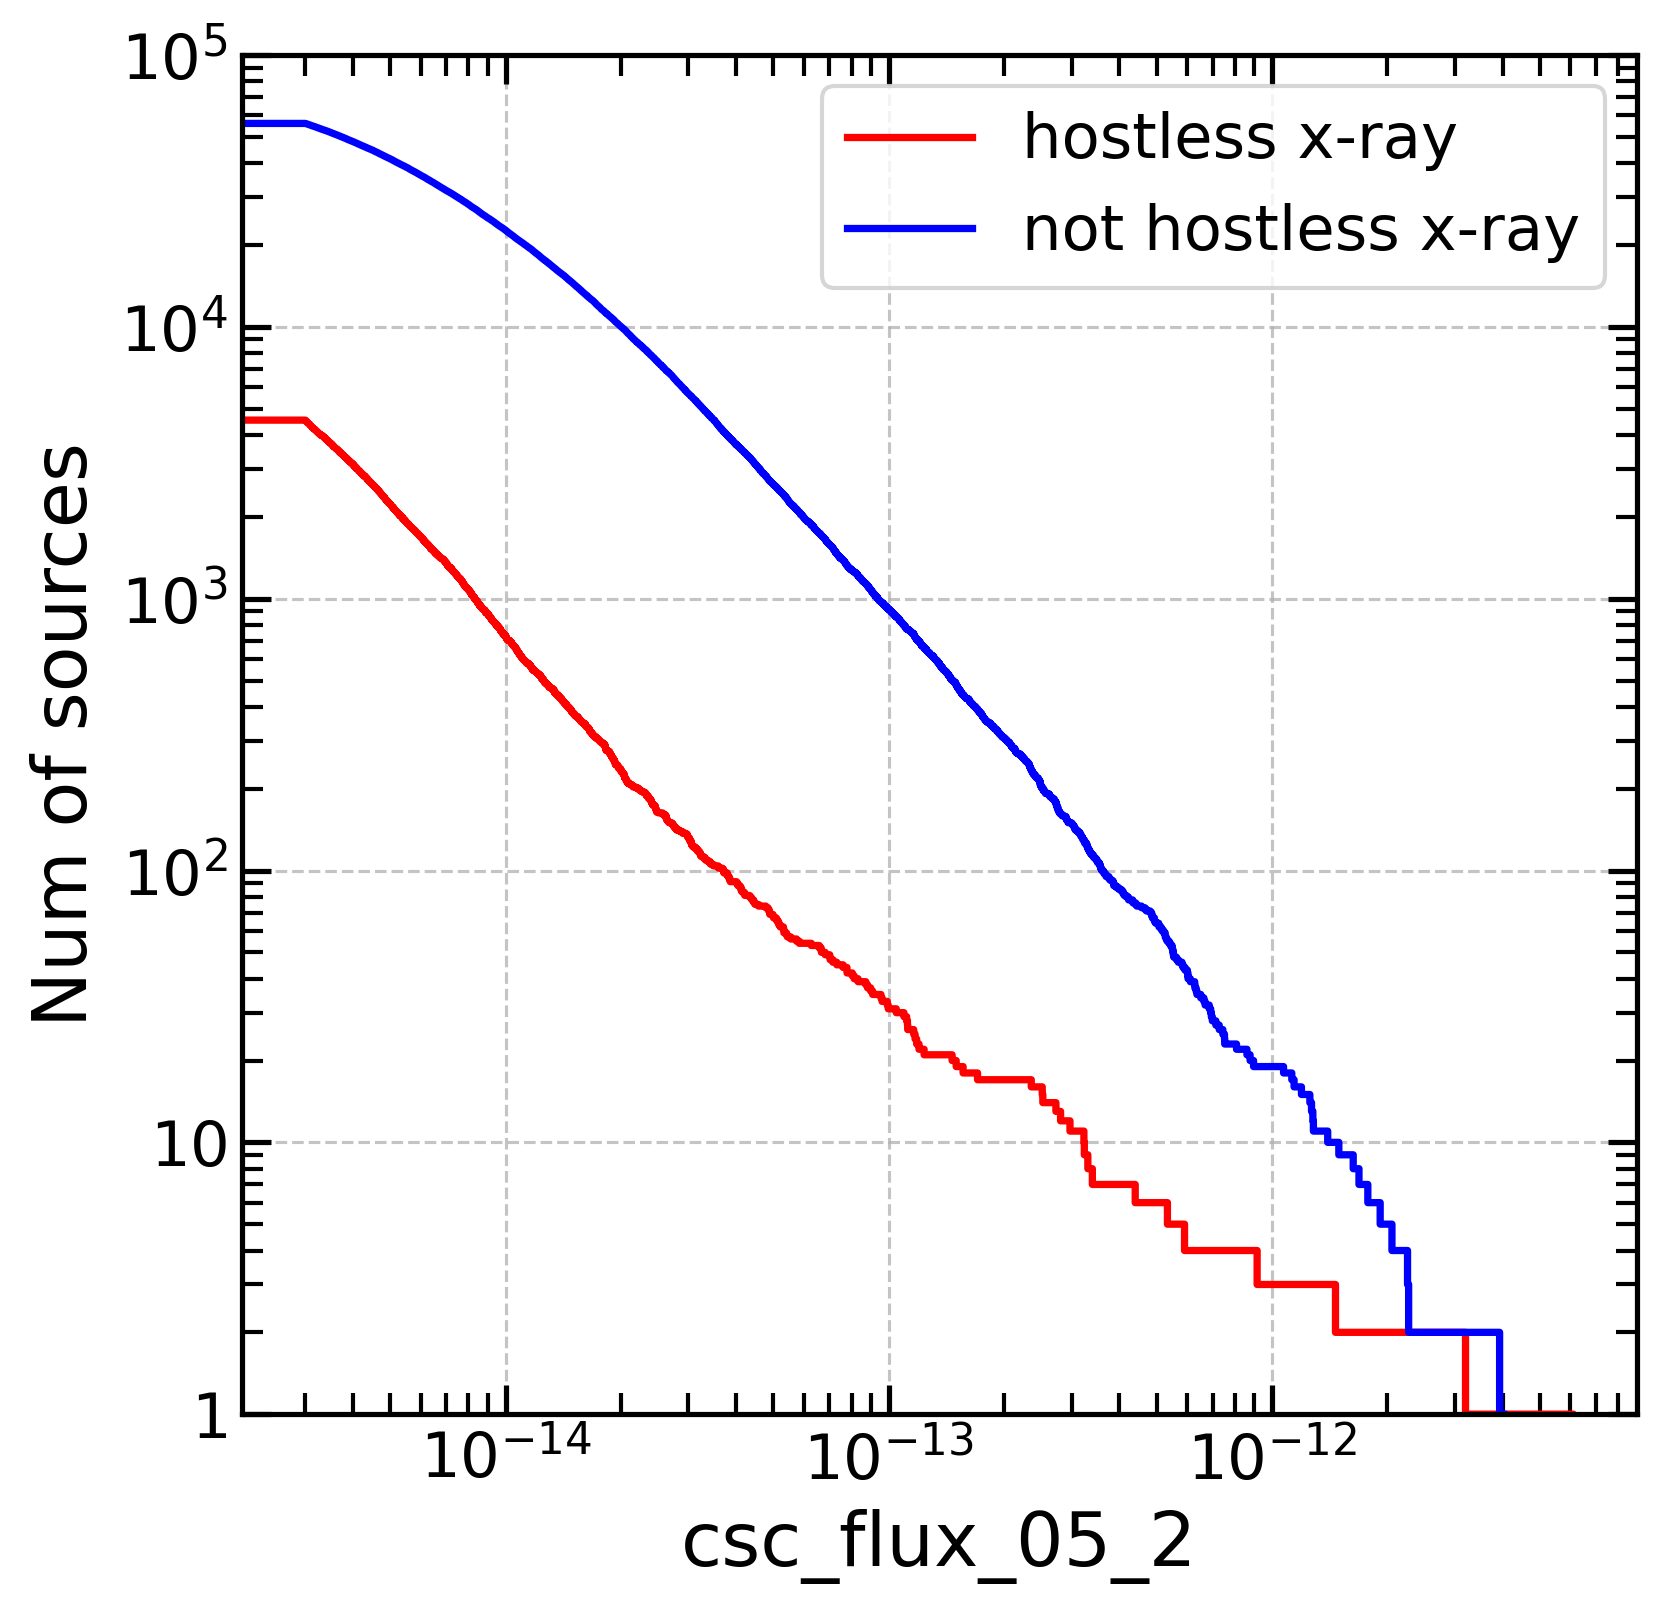

In [37]:
fig,  ax =  plt.subplots( figsize = (6,6))
sns.ecdfplot(hostless_df['csc_flux_05_2'], label='hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc_x_ray_only['csc_flux_05_2'], label='not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e5])
ax.legend()

for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc_x_ray_only.query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

flux lim: 3e-15
number of hostless x-ray sources with flux > 3e-15: 57
number of not hostless x-ray sources with flux > 3e-15: 597
fraction of hostless x-ray sources with flux > 3e-15: 0.0871559633027523
flux lim: 1e-14
number of hostless x-ray sources with flux > 1e-14: 7
number of not hostless x-ray sources with flux > 1e-14: 241
fraction of hostless x-ray sources with flux > 1e-14: 0.028225806451612902


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,smallest_sep
659175,2CXO J103319.9+572841,158.332945,57.478135,3.677832e-15,0.619007,1.731456,10.842482
661354,2CXO J103543.8+574442,158.932608,57.745044,6.884192e-15,0.557729,1.560050,2.463117
660872,2CXO J103520.9+573349,158.837140,57.563679,4.241985e-15,0.852421,2.384348,6.015550
681061,2CXO J105014.7+574016,162.561419,57.671206,8.133587e-15,2.059599,5.761006,9.776765
670907,2CXO J104411.1+585424,161.046365,58.906818,6.099061e-15,0.415344,1.161780,2.884135


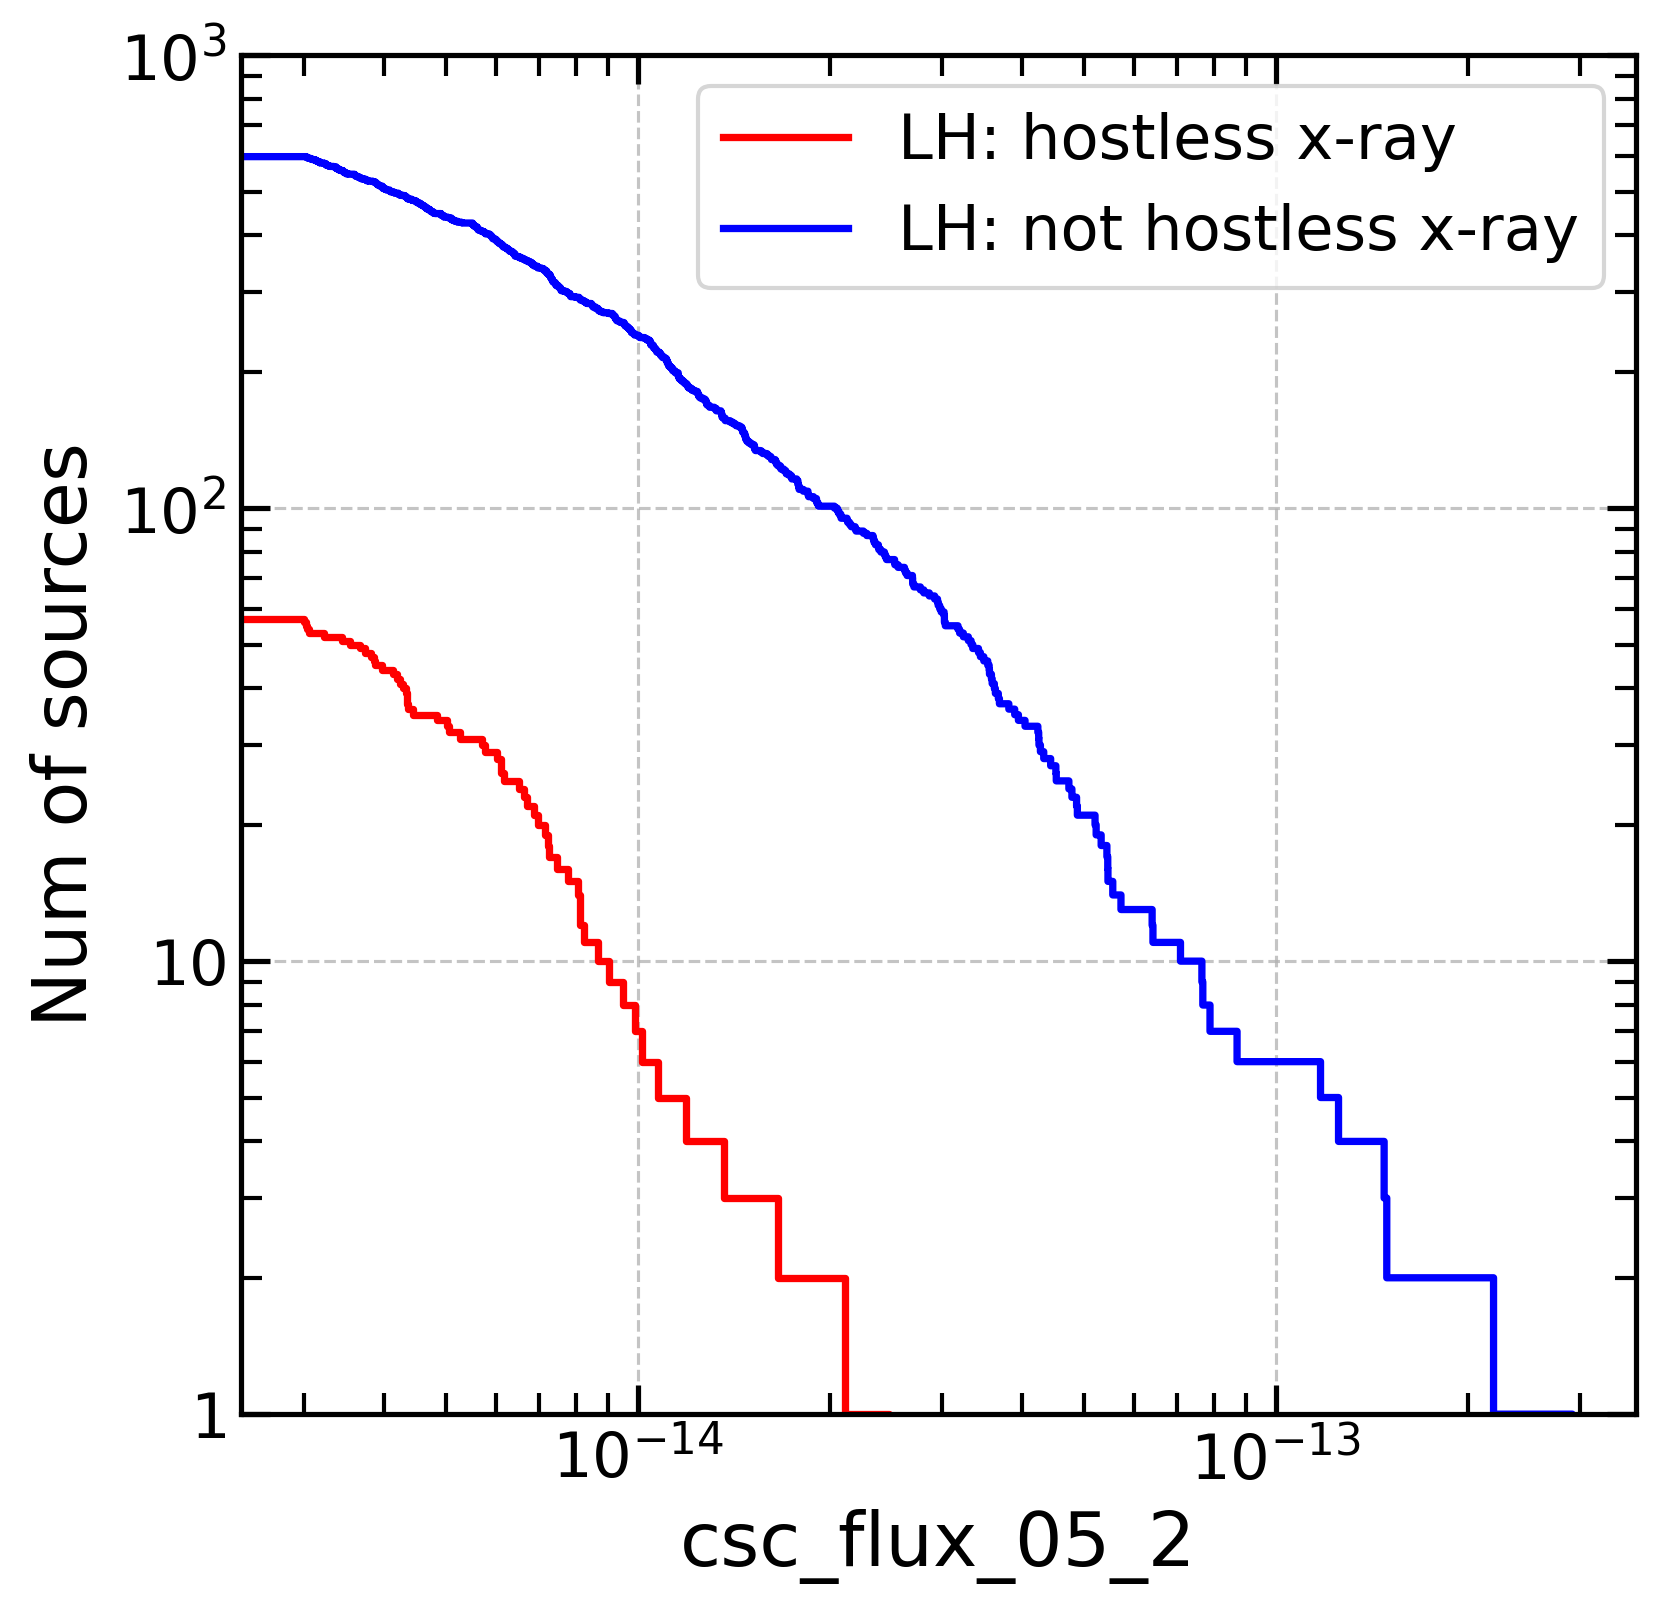

In [38]:
ra_min = 154.763934
ra_max = 167.084550
dec_min = 54.124219
dec_max = 61.236185

hostless_df_lh = hostless_df.query('csc_ra>=@ra_min & csc_ra<=@ra_max & csc_dec>=@dec_min & csc_dec<=@dec_max')
desi_csc_x_ray_only_lh = desi_csc_x_ray_only.query('csc_ra>=@ra_min & csc_ra<=@ra_max & csc_dec>=@dec_min & csc_dec<=@dec_max')

fig,  ax =  plt.subplots( figsize = (6,6))
sns.ecdfplot(hostless_df_lh['csc_flux_05_2'], label='LH: hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc_x_ray_only_lh['csc_flux_05_2'], label='LH: not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e3])
ax.legend()


for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df_lh.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc_x_ray_only_lh.query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

hostless_df_lh.sample(5)

In [40]:
erosita_orig_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl')

from scripts.cross_match_scripts import search_around_r_data_frames, cross_match_data_frames
ero_hostless = cross_match_data_frames(erosita_orig_df, hostless_df_lh, 'RA_fin', 'DEC_fin', 'csc_ra', 'csc_dec', match_radius = 30)
ero_hostless = ero_hostless.query('matched_sep < 1.5*pos_r98')
ero_hostless['flux_rat'] = ero_hostless['flux_05-20']/ero_hostless['matched_csc_flux_05_2']
ero_hostless[['srcname_fin', 'pos_r98', 'flux_05-20', 'matched_sep', 'matched_csc_name', 'matched_csc_flux_05_2','matched_csc_r_98','flux_rat']]


cross-match radius 30 arcsec
total matches: 22 out of 9215 x 57


,srcname_fin,pos_r98,flux_05-20,matched_sep,matched_csc_name,matched_csc_flux_05_2,matched_csc_r_98,flux_rat
2,SRGe J104522.1+555738,5.399608,2.008208e-14,3.681071,2CXO J104521.9+555734,4.442071e-15,1.179337,4.520883
3,SRGe J103220.4+573211,5.714911,9.351694e-15,1.421180,2CXO J103220.2+573211,4.852860e-15,1.498974,1.927048
4,SRGe J103239.4+574033,6.556224,8.782485e-15,2.364492,2CXO J103239.3+574035,8.115216e-15,1.199912,1.082224
6,SRGe J104453.1+585450,8.352394,6.555353e-15,3.940594,2CXO J104453.0+585453,6.011270e-15,1.327232,1.090510
7,SRGe J104707.4+591249,5.657161,6.344795e-15,1.199593,2CXO J104707.2+591249,6.510092e-15,1.836295,0.974609
8,SRGe J103302.4+580241,6.663467,6.085609e-15,3.061539,2CXO J103302.7+580240,5.264955e-15,2.090497,1.155871
9,SRGe J105118.0+552353,10.753160,6.044226e-15,2.045384,2CXO J105117.8+552354,3.740731e-15,2.010836,1.615787
10,SRGe J105458.3+574348,8.629343,5.335599e-15,3.784660,2CXO J105458.4+574344,5.070014e-15,1.696523,1.052383
11,SRGe J104854.4+573926,8.499000,5.270004e-15,8.777265,2CXO J104853.5+573920,7.151569e-15,2.009572,0.736902
12,SRGe J104544.5+585020,6.675908,5.020989e-15,2.557606,2CXO J104544.2+585019,4.130239e-15,2.049579,1.215666


In [42]:
finall_hostless = pd.DataFrame({'ID': ero_hostless.srcname_fin,	'desi_id_true_ctp': 'hostless'})
finall_hostless.ID = finall_hostless.ID.str.encode('utf-8')
finall_hostless.desi_id_true_ctp = finall_hostless.desi_id_true_ctp.str.encode('utf-8')
finall_hostless.to_pickle(data_path+'validation_ctps_ero_desi_lh_hostless.pkl')

finall_hostless

,ID,desi_id_true_ctp
2,b'SRGe J104522.1+555738',b'hostless'
3,b'SRGe J103220.4+573211',b'hostless'
4,b'SRGe J103239.4+574033',b'hostless'
6,b'SRGe J104453.1+585450',b'hostless'
7,b'SRGe J104707.4+591249',b'hostless'
8,b'SRGe J103302.4+580241',b'hostless'
9,b'SRGe J105118.0+552353',b'hostless'
10,b'SRGe J105458.3+574348',b'hostless'
11,b'SRGe J104854.4+573926',b'hostless'
12,b'SRGe J104544.5+585020',b'hostless'
